In [86]:
# Importing the Required Libaries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

In [87]:
training = '/kaggle/input/railway-dataset/Railway Data/training'
validation = '/kaggle/input/railway-dataset/Railway Data/validation'
testing = '/kaggle/input/railway-dataset/Railway Data/testing'
print(training)
print(validation)
print(testing)

/kaggle/input/railway-dataset/Railway Data/training
/kaggle/input/railway-dataset/Railway Data/validation
/kaggle/input/railway-dataset/Railway Data/testing


In [88]:
# Data Augmentation
train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
  )
print(train_datagen)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
print(val_datagen)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
print(test_datagen)

In [89]:
# Defining Image Size and Batch Size
img_size = (224, 224)  # Target image size
batch_size = 32

In [90]:
# Loading a Data
train_data = train_datagen.flow_from_directory(
    directory=training,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

val_data = val_datagen.flow_from_directory(
    directory=validation,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_data = test_datagen.flow_from_directory(
    directory=testing,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

print(train_data)
print(val_data)
print(test_data)

Found 657 images belonging to 2 classes.
Found 657 images belonging to 2 classes.
Found 657 images belonging to 2 classes.


In [91]:
# Defining the CNN Architecture
model = Sequential([
    InputLayer(shape=(224, 224, 3)),

    # Conv Block 1
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Block 2
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Block 3
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Conv Block 4
    Conv2D(512, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Global Pooling & Fully Connected Layers
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])
model

<Sequential name=sequential_4, built=True>

In [92]:
# Save Model
model.save("models/locomotive_classifier.h5")

In [93]:
# Printing the Summary of a Model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 222, 222, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 109, 109, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 109, 109, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 52, 52, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 26, 26, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,949,057 (7.44 MB)

 Trainable params: 1,947,137 (7.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [94]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [95]:
# Training the model
history = model.fit(
    train_data,  # Training data generator
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,  # Validation data generator
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=200  # Number of epochs to train the model
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 31s 961ms/step - accuracy: 0.5585 - loss: 6.3605 - val_accuracy: 0.6094 - val_loss: 4.5924
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5938 - loss: 4.6367 - val_accuracy: 0.4118 - val_loss: 4.5040
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 773ms/step - accuracy: 0.6330 - loss: 3.9837 - val_accuracy: 0.6109 - val_loss: 2.5425
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5625 - loss: 2.7013 - val_accuracy: 0.5294 - val_loss: 2.5389
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 773ms/step - accuracy: 0.5915 - loss: 2.1811 - val_accuracy: 0.6078 - val_loss: 1.5311
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5000 - loss: 1.6237 - val_accuracy: 0.6471 - val_loss: 1.4900
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 765ms/step - accuracy: 0.6018 - loss: 1.3998 - val_accuracy: 0.6062 - val_loss: 1.2009
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7188 - loss: 1.1145 - val_accura

In [96]:
# Evaluating the model on the train set
train_loss, train_accuracy = model.evaluate(
    train_data,  # Use the correct train data generator variable
    steps=train_data.samples // train_data.batch_size
)

# Printing the evaluation results
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {round(train_accuracy*100)}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 596ms/step - accuracy: 0.7066 - loss: 0.6860
Train Loss: 0.6967326402664185
Train Accuracy: 71%


In [97]:
# Evaluating the model on the validation set
val_loss, val_accuracy = model.evaluate(
    val_data,  # Use the correct validation data generator variable
    steps=val_data.samples // val_data.batch_size
)

# Printing the evaluation results
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {round(val_accuracy*100)}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 301ms/step - accuracy: 0.7702 - loss: 0.6012
Validation Loss: 0.5912282466888428
Validation Accuracy: 80%


In [98]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(
    test_data,  # Use the correct test data generator variable
    steps=test_data.samples // test_data.batch_size
)

# Printing the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {round(test_accuracy*100)}%")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.8099 - loss: 0.5795
Test Loss: 0.5972924828529358
Test Accuracy: 79%


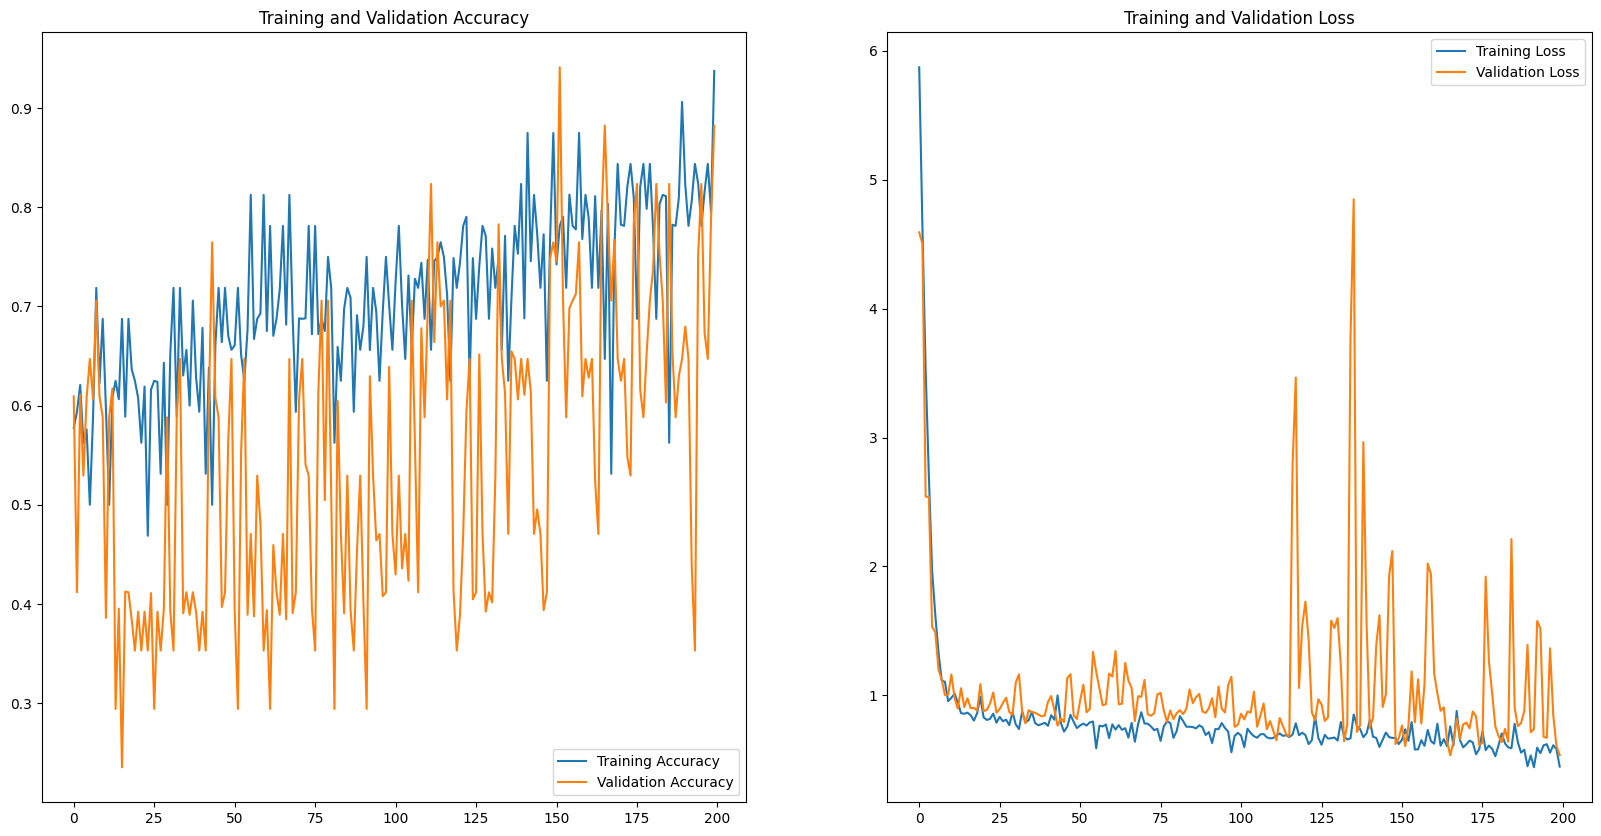

In [99]:
import matplotlib.pyplot as plt
# Plotting for Training, Validation and Testing
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

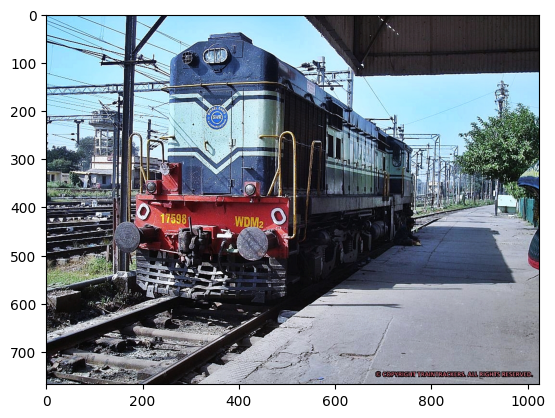

In [101]:
img1 = image.load_img('/kaggle/input/railway-dataset/Railway Data/training/Diesel Locomotives/diesel_image1127.jpg')
plt.imshow(img1)

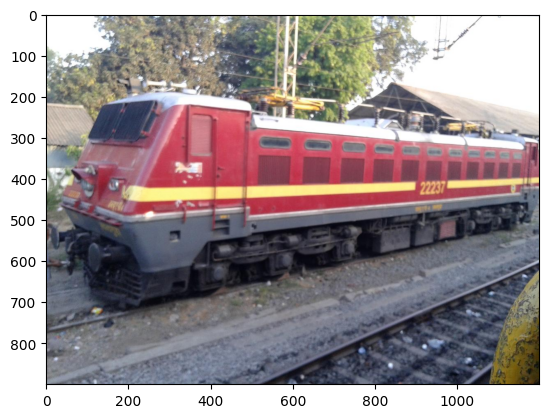

In [102]:
img2 = image.load_img('/kaggle/input/railway-dataset/Railway Data/training/Electric Locomotives/electric_image1037.jpg')
plt.imshow(img2)

In [103]:
class_labels = ['Diesel Locomotive', 'Electric Locomotive']

# Prediction without threshold value and include accuracy
def predict_image(img_path, model):
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize pixel values

  # Make prediction
  prediction = model.predict(img_array)

  # Get predicted class and confidence
  predicted_class_index = int(round(prediction[0][0]))
  predicted_class = class_labels[predicted_class_index]
  confidence = prediction[0][0]  # Probability for the predicted class

  return predicted_class, confidence * 100

# Assuming img1, img2, etc. are variables holding image paths
img_paths = [
    '/kaggle/input/railway-dataset/Railway Data/training/Diesel Locomotives/diesel_image1127.jpg',
    '/kaggle/input/railway-dataset/Railway Data/training/Electric Locomotives/electric_image1037.jpg'
]

# Iterate through image paths and make predictions
for img_path in img_paths:
  predicted_class, confidence = predict_image(img_path, model)
  print(f"Image path: {img_path}, Predicted class: {predicted_class}, Confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Image path: /kaggle/input/railway-dataset/Railway Data/training/Diesel Locomotives/diesel_image1127.jpg, Predicted class: Diesel Locomotive, Confidence: 24.97%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Image path: /kaggle/input/railway-dataset/Railway Data/training/Electric Locomotives/electric_image1037.jpg, Predicted class: Electric Locomotive, Confidence: 100.00%
